In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### ***Prepare Dataset of Gala Apple***

อ่านไฟล์ csv ของชุดข้อมูลตัวอย่างของ fuji

In [32]:
df_gala = pd.read_csv("../../../DataSet/Gala/gala.csv")

In [33]:
df_gala

,Date,Gala
0,04/01/2015,2752
1,11/01/2015,3322
2,18/01/2015,2257
3,25/01/2015,2061
4,01/02/2015,2905
...,...,...
164,25/02/2018,11798
165,04/03/2018,10102
166,11/03/2018,12281
167,18/03/2018,7738


In [34]:
df_gala["Date"] = pd.to_datetime(df_gala["Date"], format="%d/%m/%Y")
df_gala.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Gala    169 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


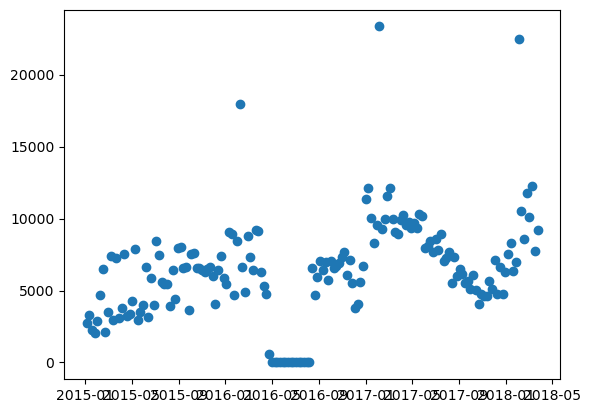

In [35]:
plt.scatter(df_gala["Date"], df_gala["Gala"])
plt.show()

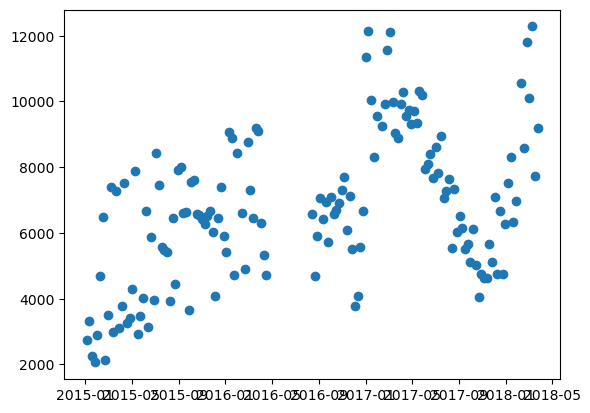

In [36]:
df_gala = df_gala[df_gala["Gala"] <= 15000]
df_gala = df_gala[df_gala["Gala"] >= 1000]

plt.scatter(df_gala["Date"], df_gala["Gala"])
plt.show()

ทำนายวันถ้ดไปโดยใส่ค่าปริมาณของแอปเปิ้ลวันก่อนหน้า

In [37]:
df_gala = df_gala.copy()
df_gala["y"] = df_gala["Gala"].shift(-1)
df_gala.dropna(inplace=True)
df_gala.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 167
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    149 non-null    datetime64[ns]
 1   Gala    149 non-null    int64         
 2   y       149 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.7 KB


In [38]:
x = np.array(df_gala.drop(columns='y'))
y = np.array(df_gala.drop(columns='Gala'))

### ***Train Model Of Gala Apple***

In [39]:
# def findBestBaseLine(r,t,x,y):
#     a = 1000000
#     index = 0
#     for i in range(r,t):
#         x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i)
#         if (buffer := mean_absolute_error(y_test[:,1:], x_test[:,1:])) < a:
#             a = buffer
#             index = i
#     print(a, index)

# findBestBaseLine(0, 100000, x, y)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=7210)

x_train = np.array(sorted(x_train, key=lambda x: x[0]))
x_test = np.array(sorted(x_test, key=lambda x: x[0]))
y_train = np.array(sorted(y_train, key=lambda x: x[0]))
y_test = np.array(sorted(y_test, key=lambda x: x[0]))

Baseline Predict

In [41]:
baseline_predict = x_test[:, 1:]

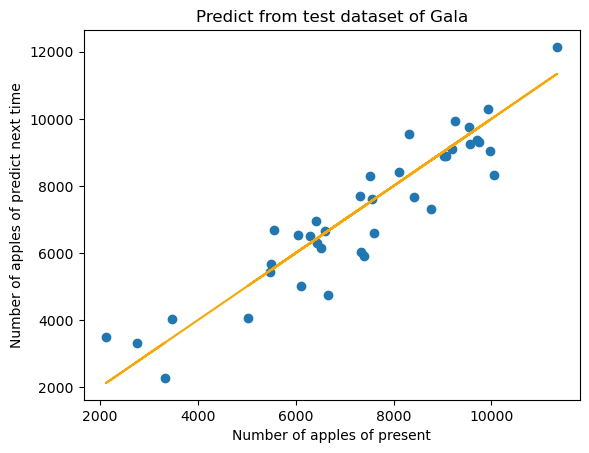

In [42]:
plt.scatter(x_test[:, 1:], y_test[:, 1:])
plt.plot(x_test[:, 1:], baseline_predict, color="orange")
plt.xlabel("Number of apples of present")
plt.ylabel("Number of apples of predict next time")
plt.title("Predict from test dataset of Gala")
plt.show()

In [43]:
def writeEvaluate(model, mae:np.float64, mse:np.float64, r2:np.float64, mape:np.float64, filename):
    df = pd.read_csv(filename)
    row_index = df.index.get_loc(df.loc[df['Model'] == model].index[0])
    df.at[row_index,'Mae'] = mae
    df.at[row_index,'Mse'] = mse
    df.at[row_index,'R2'] = r2
    df.at[row_index,'Mape'] = mape

    df.to_csv(filename,encoding='utf-8', sep=',', index=False)

### ***Predict from test_dataset Of Gala***

Mean Absolute Error: 674.0526315789474
Mean Square Error: 712851.2105263158
R2 score: 0.8500181795616505
Mean Absolute Percentage Error: 0.11599299594869683


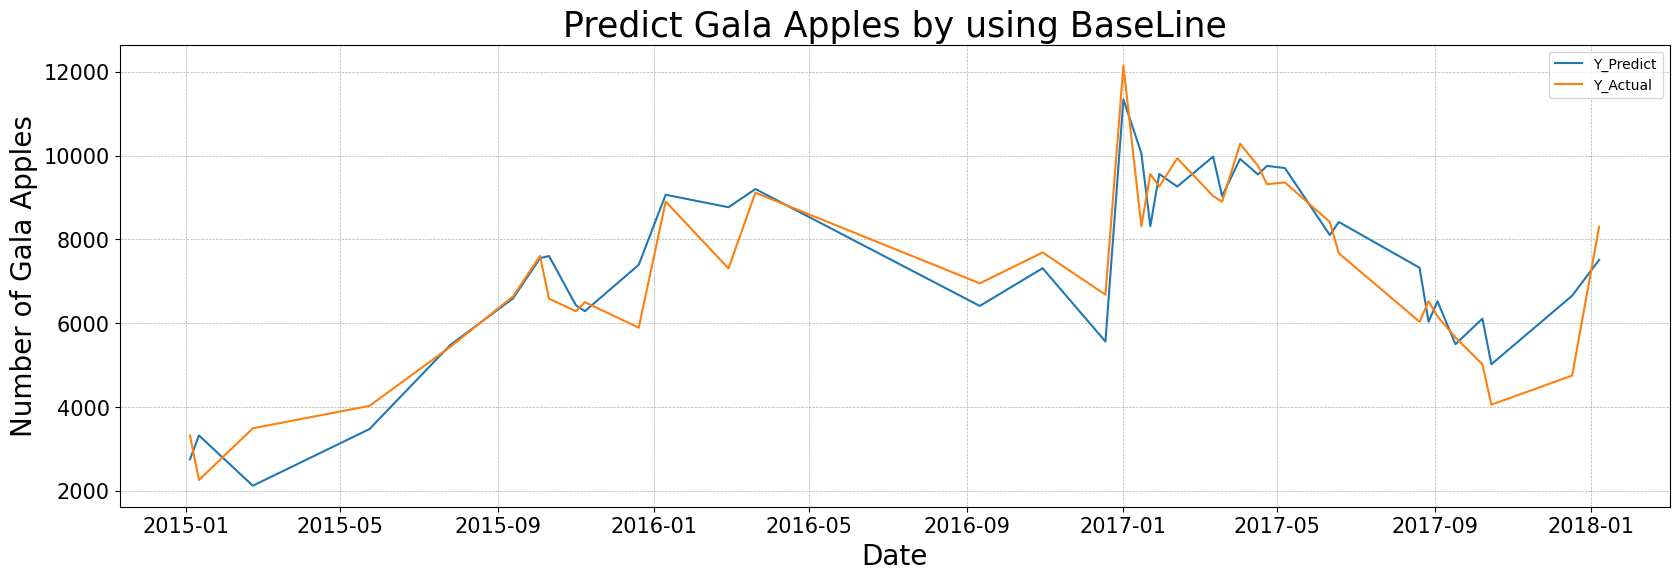

In [44]:
mae = mean_absolute_error(y_test[:, 1:], baseline_predict)
mse = mean_squared_error(y_test[:, 1:], baseline_predict)
r2 = r2_score(y_test[:, 1:], baseline_predict)
mape = mean_absolute_percentage_error(y_test[:, 1:], baseline_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Square Error: {mse}")
print(f"R2 score: {r2}")
print(f"Mean Absolute Percentage Error: {mape}")

writeEvaluate("Baseline",mae,mse,r2,mape,"evaluate.csv")

plt.figure(figsize=(20, 6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(x_test[:, :1], baseline_predict, label="Y_Predict")
plt.plot(x_test[:,:1], y_test[:, 1:], label="Y_Actual")
plt.xlabel("Date", fontsize=20)
plt.ylabel("Number of Gala Apples", fontsize=20)
plt.title("Predict Gala Apples by using BaseLine", fontsize=25)
plt.legend()
plt.grid(linestyle='--', linewidth=0.5)
plt.show()